In [32]:
import sys 
sys.path.append("../PyTIE/")
sys.path.append("../SimLTEM/")
from TIE_helper import show_im, show_2D
from sim_helper import *
from TIE_reconstruct import TIE, SITIE
from comp_phase import mansPhi, linsupPhi
import numpy as np
import matplotlib.pyplot as plt


In [33]:
# Define material parameters

B0 = 1e4 # gauss
sample_V0 = 0 # V
sample_xip0 = 50 # nm
mem_thk = 25 # nm
mem_xip0 = 1000 # nm

In [34]:
file = "./f1-48000.ovf"
mag_x, mag_y, mag_z, del_px, zscale = load_ovf(file, 'norm', B0, v=0)

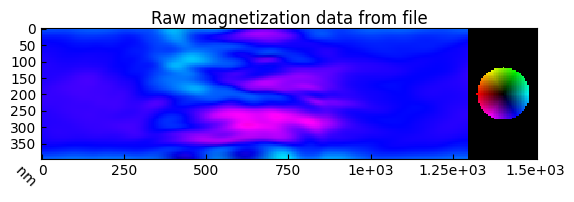

In [35]:
from colorwheel import color_im
mag_x, mag_y, mag_z, del_px, zscale = load_ovf(file, 'norm', B0, v=0)
# The input ovf might be many layers thick, so we sum along the z-direction to 
# make a 2D image to display. 
show_im(color_im(np.sum(mag_x, axis=0), np.sum(mag_y,axis=0), hsvwheel=True), 
        title="Raw magnetization data from file", cbar=False, scale=del_px,)

In [36]:
b0 = B0 # Gauss 
V0 = sample_V0 # V
Mag_x = np.sum(mag_x, axis=0)
Mag_y = np.sum(mag_y, axis=0)
Mag_z = np.sum(mag_z, axis=0)

In [37]:
# Apply mansuripur algorithm with some standard materials parameters. 
ephi_m, mphi_m = std_mansPhi(mag_x, mag_y, mag_z, 
                             isl_thk=zscale*5, # thickness of the magnetic structure in nm, 1 layer thick here
                             zscale=zscale, 
                             del_px=del_px,
                             b0=b0, isl_V0=V0)

In [41]:
# using the linear superposition phase 
ALTEM = Microscope(E=200e3,Cs = 200.0e3, theta_c = 0.01e-3, def_spr = 80.0)
defval = 3000000 # nm 
amorphous_noise = 0.2 # unitless scaling parameter 
Tphi, im_un, im_in, im_ov = sim_images(mphi=mphi_m, ephi=ephi_m, 
                                       pscope=ALTEM,
                                       del_px=del_px, 
                                       def_val=defval,
                                       add_random=amorphous_noise)

Total fov is (1.3e+03,400) nm


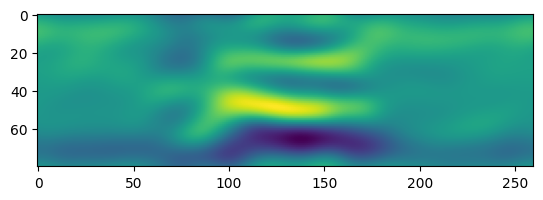

In [42]:
plt.imshow(im_un)